In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import cv2

# Contoh membaca gambar
img_array = cv2.imread(r"C:\Users\Windows 11\Documents\Train Emotion\archive\test\angry\PrivateTest_88305.jpg")  

# Verifikasi hasil pembacaan gambar
if img_array is None:
    print("Gambar tidak ditemukan. Periksa path file!")
else:
    print("Gambar ditemukan dengan dimensi:", img_array.shape)


Gambar ditemukan dengan dimensi: (48, 48, 3)


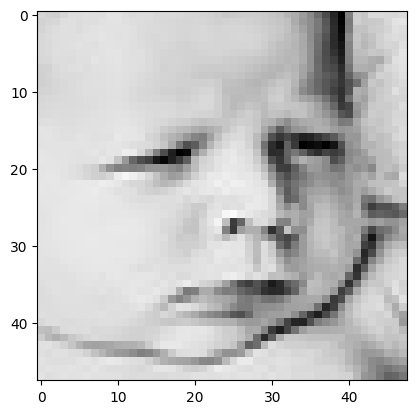

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = r"C:\Users\Windows 11\Documents\Train Emotion\archive\test" #Training dataset

In [7]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"] #ListClass

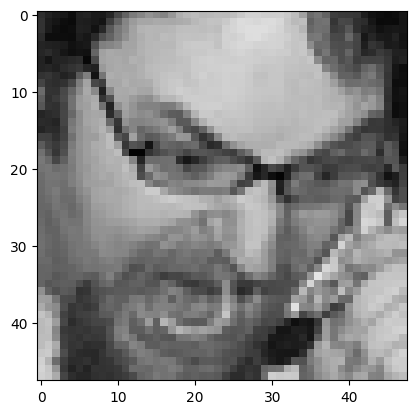

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

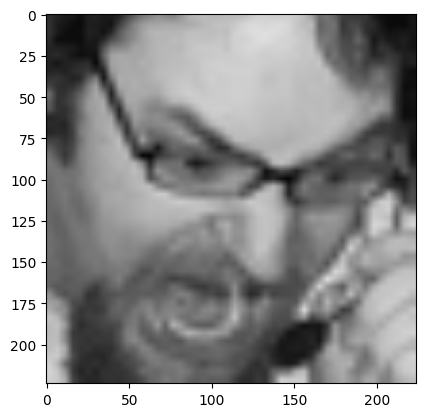

In [9]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

7178


In [13]:
temp = np.array(training_Data, dtype=object)

In [14]:
temp.shape

(7178, 2)

In [15]:
import random

random.shuffle(training_Data)

In [16]:
X = [] #data
y = [] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)


In [17]:
X.shape

(7178, 224, 224, 3)

In [18]:
X= X/255.0; #normalize

In [19]:
Y= np.array(y)

In [20]:
Y.shape

(7178,)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2()

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
base_input = model.layers[0].input

In [25]:
base_output = model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [31]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [32]:
new_model.fit(X,Y, epochs = 25)

Epoch 1/25
225/225 [==============================] - 529s 2s/step - loss: 1.4174 - accuracy: 0.4585
Epoch 2/25
225/225 [==============================] - 483s 2s/step - loss: 1.1928 - accuracy: 0.5514
Epoch 3/25
225/225 [==============================] - 488s 2s/step - loss: 1.0924 - accuracy: 0.5915
Epoch 4/25
225/225 [==============================] - 494s 2s/step - loss: 1.0176 - accuracy: 0.6134
Epoch 5/25
225/225 [==============================] - 483s 2s/step - loss: 0.9354 - accuracy: 0.6499
Epoch 6/25
225/225 [==============================] - 475s 2s/step - loss: 0.8764 - accuracy: 0.6673
Epoch 7/25
225/225 [==============================] - 475s 2s/step - loss: 0.7860 - accuracy: 0.7055
Epoch 8/25
225/225 [==============================] - 522s 2s/step - loss: 0.7453 - accuracy: 0.7331
Epoch 9/25
225/225 [==============================] - 487s 2s/step - loss: 0.6379 - accuracy: 0.7699
Epoch 10/25
225/225 [==============================] - 499s 2s/step - loss: 0.5838 - accura

KeyboardInterrupt: 

In [32]:
new_model.save('my_model_partial.h5')


In [33]:
from tensorflow.keras.models import load_model

# Load model yang telah tersimpan
new_model = load_model('my_model_partial.h5')

# Lanjutkan training dari epoch terakhir
new_model.fit(X, Y, epochs=25, initial_epoch=21)  # Mulai dari epoch 22


Epoch 22/25
225/225 [==============================] - 512s 2s/step - loss: 1.4179 - accuracy: 0.0964
Epoch 23/25
225/225 [==============================] - 580s 3s/step - loss: 1.2056 - accuracy: 0.1289
Epoch 24/25
225/225 [==============================] - 615s 3s/step - loss: 1.1008 - accuracy: 0.1383
Epoch 25/25
225/225 [==============================] - 552s 2s/step - loss: 1.0302 - accuracy: 0.1390


In [ ]:
new_model.save('my_model_64p35.h5')

In [54]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

OSError: No file or directory found at Final_model_95p07.h5

In [55]:
frame = cv2.imread('happyboy.jpg')

In [56]:
frame.shape

(853, 1280, 3)

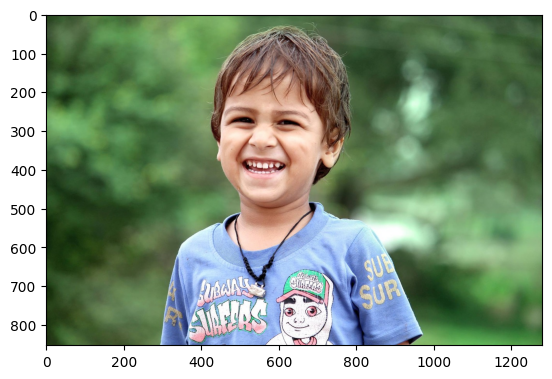

In [57]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [58]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [59]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [60]:
gray.shape

(853, 1280)

In [63]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

face not Detected
face not Detected


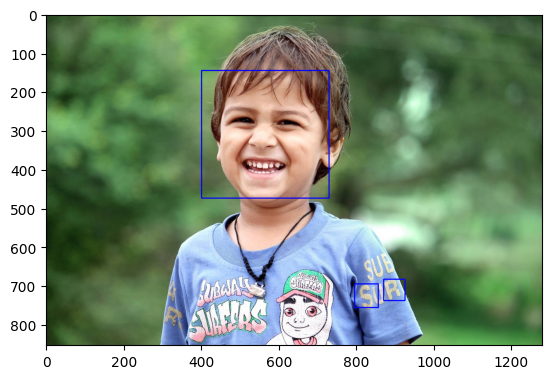

In [64]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

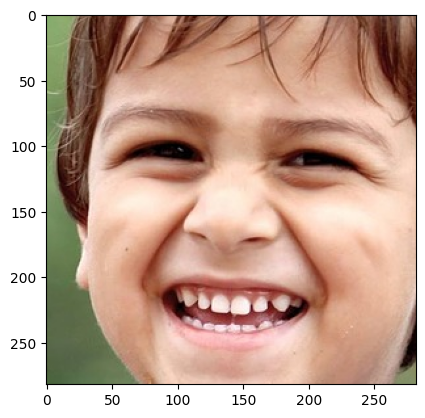

In [65]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [66]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image=final_image/255.0

In [67]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 729ms/step


In [68]:
Predictions[0]

array([0.09374936, 0.11777471, 0.12251332, 0.2667402 , 0.15381758,
       0.08227696, 0.16312784], dtype=float32)

In [69]:
np.argmax(Predictions)

3

In [34]:
import numpy as np



In [35]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model_partial.h5')  # Path ke model yang Anda simpan


In [ ]:
#DEMO VIDEO

In [8]:
import cv2
import numpy as np
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)

img = np.zeros((500, 500))

text = "Some text in a box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open Camera")

while True:
    ret, frame = cap.read()

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image=final_image/255.0

    font = cv2.FONT_HERSEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN


    if (np.argmax(Predictions)==0):
        status = 'Angry'

        x1,y1,w1,h1 = 0, 0, 175, 75

        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

    elif (np.argmax(Predictions)==1):
        status = 'Disgust'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

    elif (np.argmax(Predictions)==2):
        status = 'Fear'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

    elif (np.argmax(Predictions)==3):
        status = 'Happy'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

    elif (np.argmax(Predictions)==4):
        status = 'Sad'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))
        
    elif (np.argmax(Predictions)==5):
        status = 'Surprise'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))

    else:
        status = 'Neutral'
        
        x1,y1,w1,h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0, 255))
    

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'FONT_HERSEY_SIMPLEX'

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
new_model = load_model('my_model_partial.h5')

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open Camera")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) > 0:
        for x, y, w, h in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            try:
                face_roi = cv2.resize(roi_color, (224, 224))
                face_roi = np.expand_dims(face_roi, axis=0) / 255.0
                Predictions = new_model.predict(face_roi)

                status = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][np.argmax(Predictions)]
                cv2.putText(frame, status, (x, y - 10), font, 1.5, (0, 255, 0), 2)
            except Exception as e:
                print(f"Error processing ROI: {e}")
    else:
        print("No faces detected in this frame")

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 35ms/step
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
1/1 [==============================] - 0s 35ms/step
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
1/1 [==============================] - 0s 33ms/step
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
No faces detected in this frame
1/1 [==============================] - 0s 36ms/step
No faces detected in this frame
1/1 [==============================] - 0s 35ms/step
No faces detected in this frame
1/1 [==============================] - 0s 36ms/step


In [7]:
print(X_train.shape)  # Contoh: (jumlah_data, tinggi, lebar, channels)


NameError: name 'X_train' is not defined